In [1]:
set.seed(1)

In [6]:
make_A <- function(x, p) {
    A <- 1
    for (k in 1 : p) {
        A <- cbind(A, x ^ k)
    }
    return(A)
}

In [7]:
find_dep_lr <- function(x, y, p=1) {
    A <- make_A(x, p)
    At <- t(A)
    w <- solve(At %*% A) %*% At %*% y
    return(w)
}

task13 subtask

In [41]:
task13 <- function(mean, sd) {
    # a)
    X <- rnorm(100)
    # b)
    eps <- rnorm(100, mean = mean, sd = sd)
    # c)
    Y <- - 1 + 0.5 * X + eps
    # What is the length of the vector y?
    # Answer: 100
    # What are the values of β0 and β1 in this linear model?
    # Answer: β0 = -1, β1 = 0.5
    # d)
    plot(X, Y, col = "red", pch = 19)
    # Comment on what you observe.
    # Answer: Четко прослеживается зависимость данных друг от друга.
    # e)
    bt <- find_dep_lr(X, Y, p = 1)
    print(paste0("real b: [", - 1, ", ", 0.5, "] pred b: [", bt[1], ", ", bt[2], "]"))
    # Comment on the model obtained.
    # Answer: Модель удачная.
    # How do βˆ0 and βˆ1 compare to β0 and β1?
    # Answer: Очень близки.
    # f)
    lx <- seq(min(X), max(X), length = 1000)
    ly <- make_A(lx, p = 1) %*% bt
    lines(lx, ly, col = "blue")
    # g)
    sqt = find_dep_lr(X, Y, p = 2)
    ly <- make_A(lx, p = 2) %*% sqt
    lines(lx, ly, col = "green")
    legend("topleft", legend = c("points", "lq line", "p2 line"),
    bty = "n", col = c("red", "blue", "green"), pch = c(19, 19, 19))
    MSE1 = mean((make_A(X, p = 1) %*% bt - Y) ^ 2)
    MSE2 = mean((make_A(X, p = 2) %*% sqt - Y) ^ 2)
    print(paste0("p=1 MSE:", MSE1, " p=2 MSE: ", MSE2))
    # Is there evidence that the quadratic term improves the model fit?
    # Answer: Да, улучшилось, но очень незначительно. По графику видно, что нам не нужна
    # квадратная функция, чтобы приблизить зависимость значительно лучше.
}

[1] "real b: [-1, 0.5] pred b: [-0.972715116601002, 0.519404757493831]"
[1] "p=1 MSE:0.0656226401616027 p=2 MSE: 0.0654122069662769"


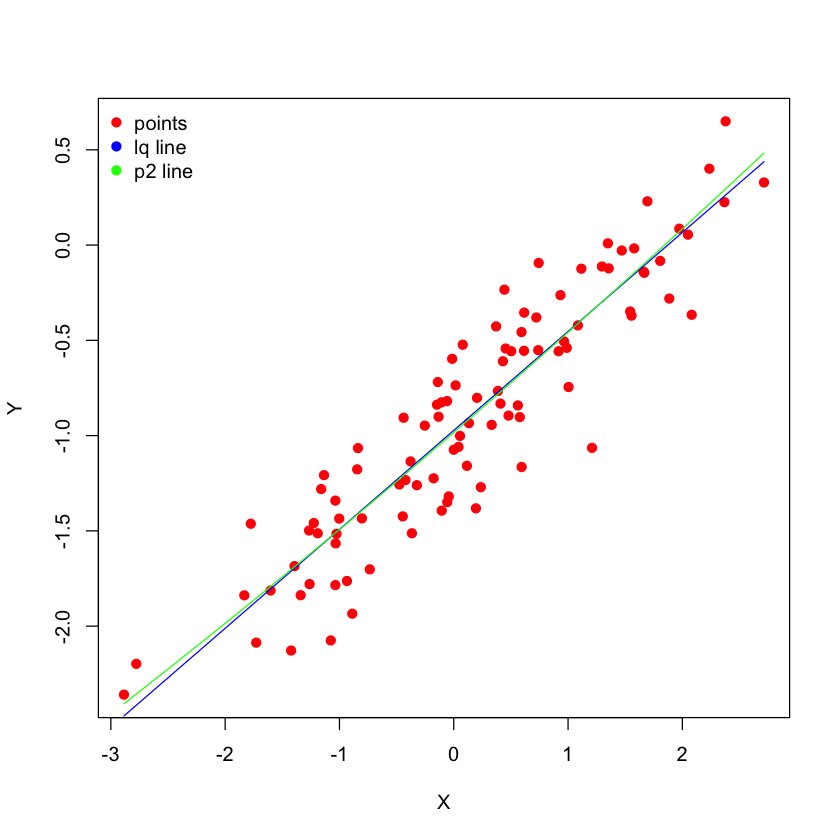

In [42]:
task13(mean = 0, sd = 0.25)

[1] "real b: [-1, 0.5] pred b: [-0.984143183971706, 0.474378629557422]"
[1] "p=1 MSE:0.0249325193202998 p=2 MSE: 0.0249248355732402"


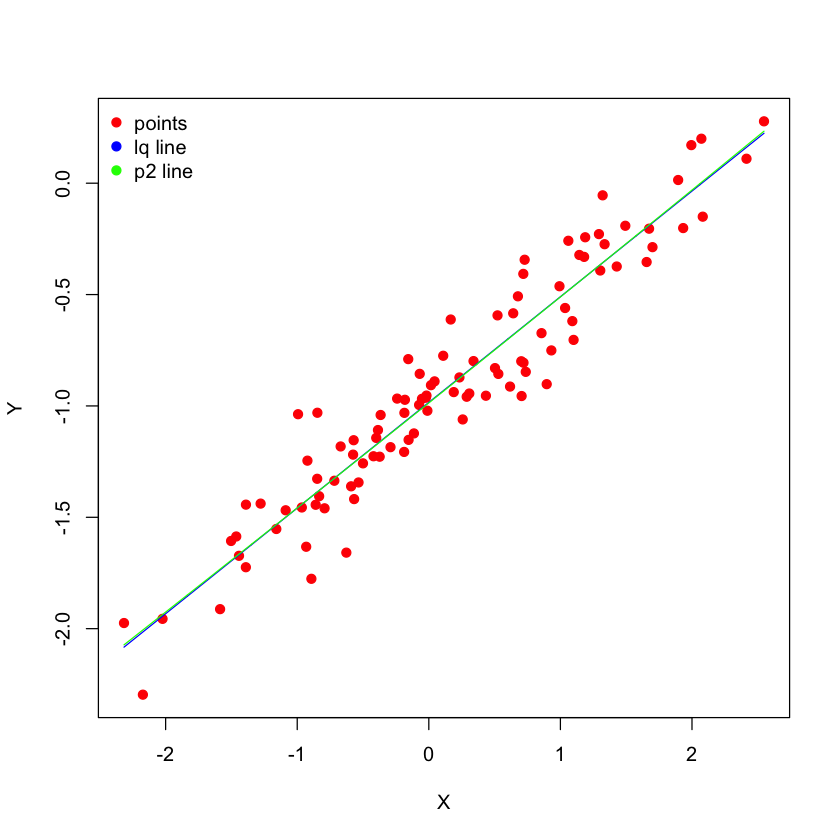

In [43]:
task13(mean = 0, sd = 0.15)

[1] "real b: [-1, 0.5] pred b: [-0.987182492592462, 0.51966052960156]"
[1] "p=1 MSE:0.244077156211253 p=2 MSE: 0.239933356943756"


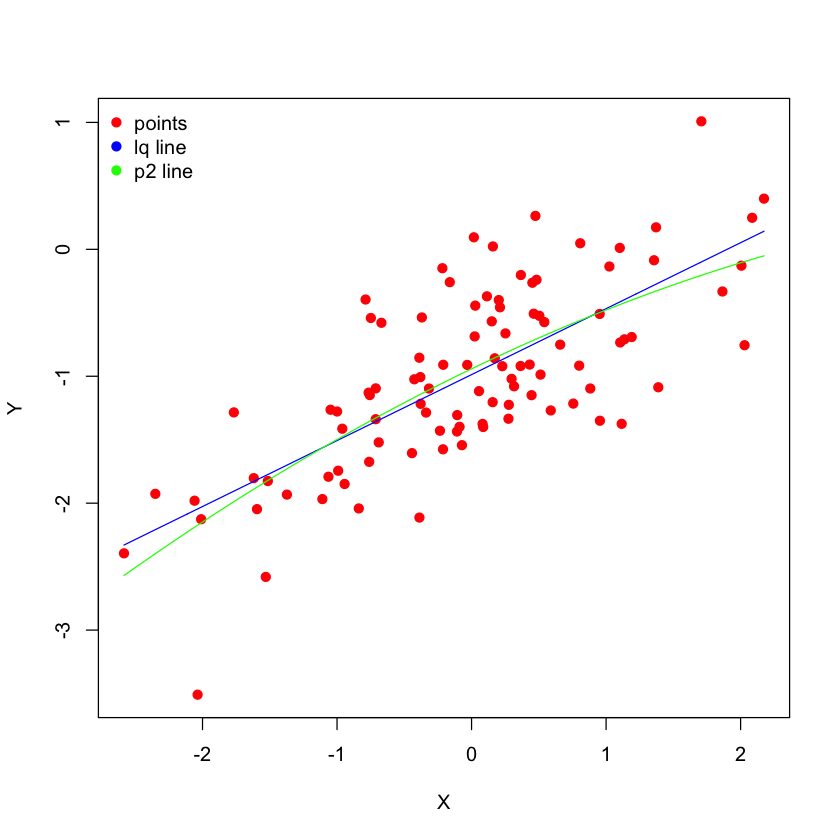

In [44]:
task13(mean = 0, sd = 0.5)

# h, i

Describe your results: Ошбика при большем разбросе - увеличивается, а при меньшем - уменьшается (что логично).

# j

What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set?: $\beta_0$ и $\beta_1$ во всех случаях предсказываются довольно хорошо. Несмотря на то, что разброс изменяется в разные стороны, характер зависимости продолжает оставаться неизменным (видно по картинкам).